In [1]:
# Import statements
import numpy as numpy
import pandas as pd
import seaborn as sns #for plotting
import matplotlib.pyplot as plt
import random

In [14]:
! conda install pymol

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - pymol

Current channels:

  - https://conda.anaconda.org/bpteague/osx-64
  - https://conda.anaconda.org/bpteague/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [2]:
# Define datasets for individual inhibitory checkpoints
data = pd.read_csv('data/ab_ag.tsv', sep='\t')
pd1 = data[data['compound'].str.contains('PD-1', na=False)]
pdl1 = data[data['compound'].str.contains('PD-L1', na=False)]
ctla4 = data[data['compound'].str.contains('CTLA-4', na=False)]
kir = data[data['compound'].str.contains('KIR', na=False)]
lag3 = data[data['compound'].str.contains('LAG', na=False)]
tim3 = data[data['compound'].str.contains('TIM3', na=False)]

In [3]:
# Filter out necessary columns
pd1 = pd1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
pdl1 = pdl1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
ctla4 = ctla4[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
kir = kir[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
lag3 = lag3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
tim3 = tim3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]

In [4]:
combined_dataset = [pdl1, pd1, ctla4, kir, lag3, tim3]

# Shuffle the list randomly
random.shuffle(combined_dataset)

# Concatenate them in the new random order
merged_df = pd.concat(combined_dataset, ignore_index=True)
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

In [5]:
shuffled_df = shuffled_df[shuffled_df['resolution'] < 3.5]
shuffled_df = shuffled_df.dropna()

In [6]:
l = ['CTLA-4', 'TIM3', 'PD-1', 'PD-L1', 'KIR', 'LAG3']

new_df = pd.DataFrame(index = l)

for item in l:
    count = shuffled_df[shuffled_df['compound'].str.contains(item, na=False)].shape[0]
    new_df.loc[item, 'count'] = count

new_df = new_df.reset_index()
new_df.columns = ['checkpoint', 'count'] 

In [7]:
# 1. Filter all relevant rows: those with 'mab' OR 'M6903'
ab_mask = shuffled_df['compound'].str.contains('mab|M6903', na=False, case=False)
shuffled_df_ab = shuffled_df[ab_mask]

# 2. Extract antibody names
shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)

# 3. Fill in M6903 manually where missing
m6903_mask = shuffled_df_ab['compound'].str.contains('M6903', na=False)
shuffled_df_ab.loc[m6903_mask, 'antibody'] = shuffled_df_ab.loc[m6903_mask, 'antibody'].fillna('M6903')

# # 4. Extract checkpoint names
checkpoints_pattern = r'\b(PD-1|PD-L1|CTLA-4|KIR2DL3|TIM3)\b'
shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)

# # 5. Final formatting
shuffled_df_ab = shuffled_df_ab[['antibody', 'checkpoint', 'pdb', 'Hchain', 'Lchain', 'antigen_chain']]
shuffled_df_ab['antibody'] = shuffled_df_ab['antibody'].str.upper()

shuffled_df_ab


/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_68370/2002865464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)
/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_68370/2002865464.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)


,antibody,checkpoint,pdb,Hchain,Lchain,antigen_chain
1,PEMBROLIZUMAB,PD-1,5b8c,K,J,L
2,CEMIPLIMAB,PD-1,7wvm,A,B,E
6,IPILIMUMAB,CTLA-4,5xj3,J,K,L
7,DURVALUMAB,PD-L1,5x8m,B,C,A
8,IPILIMUMAB,CTLA-4,5tru,H,L,C
10,ATEZOLIZUMAB,PD-L1,5x8l,F,K,A
11,ATEZOLIZUMAB,PD-L1,5xxy,H,L,A
12,PEMBROLIZUMAB,PD-1,5b8c,H,G,I
14,ATEZOLIZUMAB,PD-L1,5x8l,H,M,C
15,TISLELIZUMAB,PD-1,7cgw,A,B,C


In [8]:
pdb_list = shuffled_df_ab['pdb'].unique().tolist()
#shuffled_df_ab['antibody'] = shuffled_df_ab['antibody'].str.upper()

with open('pdb_list.txt', 'w') as f:
    for pdb in pdb_list:
        f.write(pdb + '\n')

In [11]:
!which python

/Users/alicehovsepyan/opt/miniconda3/bin/python


# Epitope Mapping and Interface Area Try-Out

In [10]:
# nicht generalisierter Code 
from pymol import cmd

# Input 
pdb_file = "7cu5.pdb"           # Replace with your file path
antibody_chains = "Q"         # Replace with your antibody chains
antigen_chain = "A"             # Replace with your antigen chain
cutoff_distance = 5.0           # Distance cutoff in Å

# Load structure 
cmd.reinitialize()
cmd.load(pdb_file)

# Define selections
cmd.select("antibody", f"chain {antibody_chains}")
cmd.select("antigen", f"chain {antigen_chain}")

# Epitope: antigen residues near antibody 
cmd.select("epitope", f"antigen within {cutoff_distance} of antibody")

epitope_area = cmd.get_area("epitope")
print(f"Epitope surface area: {epitope_area:.2f} Å²")

# Visualization
cmd.show("cartoon", "all")
cmd.show("sticks", "epitope")
cmd.color("yellow", "epitope")
cmd.label("epitope", "resn + resi")

# Save session
output_name = pdb_file.replace(".pdb", "_epitope.pse")
cmd.save(output_name)
print(f"Epitope mapping done. Saved session as {output_name}")


ModuleNotFoundError: No module named 'pymol'

# List of PDBS and Chains

In [ ]:
# make a list of the columns 
shuffled_df_ab = shuffled_df_ab[['pdb', 'Hchain', 'Lchain', 'antigen_chain']]
extracted_list = shuffled_df_ab.values.tolist()

extracted_list


[['5ggs', 'A', 'B', 'Z'],
 ['8tui', 'H', 'L', 'A'],
 ['7su1', 'H', 'L', 'C'],
 ['7cgw', 'H', 'L', 'P'],
 ['7bxa', 'H', 'L', 'P'],
 ['7su0', 'I', 'M', 'D'],
 ['6rp8', 'H', 'L', 'C'],
 ['5xj3', 'J', 'K', 'L'],
 ['6k0y', 'A', 'B', 'C'],
 ['5x8l', 'H', 'M', 'C'],
 ['7cu5', 'B', 'B', 'E'],
 ['5jxe', 'D', 'C', 'B'],
 ['5x8l', 'G', 'L', 'B'],
 ['7cgw', 'A', 'B', 'C'],
 ['5x8m', 'B', 'C', 'A'],
 ['5ggr', 'H', 'L', 'Z'],
 ['5b8c', 'B', 'A', 'C'],
 ['6txz', 'I', 'M', 'B'],
 ['7wvm', 'C', 'D', 'F'],
 ['7cu5', 'A', 'A', 'Q'],
 ['5ggs', 'C', 'D', 'Y'],
 ['5xj3', 'G', 'H', 'I'],
 ['5b8c', 'E', 'D', 'F'],
 ['5grj', 'H', 'L', 'A'],
 ['5x8l', 'F', 'K', 'A'],
 ['5xj3', 'A', 'B', 'C'],
 ['5x8l', 'J', 'O', 'E'],
 ['7bxa', 'B', 'C', 'A'],
 ['5b8c', 'H', 'G', 'I'],
 ['5b8c', 'K', 'J', 'L'],
 ['7wsl', 'H', 'L', 'D'],
 ['7wvm', 'A', 'B', 'E'],
 ['5tru', 'h', 'l', 'c'],
 ['6txz', 'H', 'L', 'A'],
 ['9dq4', 'H', 'L', 'A'],
 ['6rp8', 'h', 'l', 'c'],
 ['8gy5', 'H', 'L', 'P'],
 ['5xxy', 'H', 'L', 'A'],
 ['8gy5', 'A

# Surface Area, H-Bonds and Salt Bridges

In [ ]:
import os
from pymol import cmd
import pandas as pd

results = []

# input 
root_folder = "structures"
cutoff_distance = 5.0  # in Å distance
hbond_cutoff = 3.5  # in Å distance for hydrogen bonds
salt_cutoff = 4.0  # in Å distance for salt bridges

# Ensure extracted_list is defined
if 'extracted_list' not in locals():
    extracted_list = []  # Replace with actual data if available

# Your extracted list from your DataFrame Format: [pdb_id, H_chain, L_chain, antigen_chain]

# Loop over each chain combination from the extracted list
for pdb_id, h_chain, l_chain, ag_chain in extracted_list:
    pdb_path = None
    for dirpath, _, filenames in os.walk(root_folder):
        for file in filenames:
            if file.lower() == f"{pdb_id.lower()}.pdb":
                pdb_path = os.path.join(dirpath, file)
                break
        if pdb_path:
            break

    if not pdb_path:
        print(f"Skipping {pdb_id}: PDB file not found")
        continue
    else:
        print(f"Processing {pdb_id}...")

        cmd.reinitialize()
        cmd.load(pdb_path)

        # Selections
        cmd.select("antibody", f"chain {h_chain}+{l_chain}")
        cmd.select("antigen", f"chain {ag_chain}")
        cmd.select("epitope", f"antigen within {cutoff_distance} of antibody")

        # Color antibody chains 
        cmd.color("marine", f"chain {h_chain}")
        cmd.color("skyblue", f"chain {l_chain}")

        # Color antigen chain (e.g., salmon)
        cmd.color("salmon", "antigen")

        # Optional: highlight epitope (already near antigen)
        cmd.color("yellow", "epitope")

        # Surface area
        epitope_area = cmd.get_area("epitope")
        print(f"   ➤ Epitope surface area: {epitope_area:.2f} Å²")

        # Hydrogen bonds
        hbonds = cmd.find_pairs("antibody", "antigen", mode=1, cutoff=hbond_cutoff)
        num_hbonds = len(hbonds)
        print(f"Found {num_hbonds} hydrogen bonds at the interface.")

        # salt bridges 
        # 1) antibody acidic O  → antigen basic N
        cmd.select("acidic_ab", f"chain {h_chain}+{l_chain} and resn ASP+GLU "
                                "and name OD1+OD2+OE1+OE2")
        cmd.select("basic_ag",  f"chain {ag_chain} and resn LYS+ARG+HIS "
                                "and name NZ+NH1+NH2+ND1+NE2")
        sb1 = cmd.find_pairs("acidic_ab", "basic_ag", cutoff=salt_cutoff, mode=1)

        # 2) antigen acidic O → antibody basic N
        cmd.select("acidic_ag", f"chain {ag_chain} and resn ASP+GLU "
                                "and name OD1+OD2+OE1+OE2")
        cmd.select("basic_ab",  f"chain {h_chain}+{l_chain} and resn LYS+ARG+HIS "
                                "and name NZ+NH1+NH2+ND1+NE2")
        sb2 = cmd.find_pairs("acidic_ag", "basic_ab", cutoff=salt_cutoff, mode=1)

        # cleanup salt-bridge selections
        for sel in ("acidic_ab","basic_ag","acidic_ag","basic_ab"):
            cmd.delete(sel)

        num_salt_bridges = len(sb1) + len(sb2)
        print(f"   ➤ Salt bridges: {num_salt_bridges}")

        # save session (optional) 
        session_out = os.path.join(dirpath, f"{pdb_id}_epitope.pse")
        cmd.save(session_out)

        # collect results 
        results.append({
            "pdb_id":              pdb_id,
            "H_chain":             h_chain,
            "L_chain":             l_chain,
            "antigen_chain":       ag_chain,
            "epitope_area":     epitope_area,
            "num_hydrogen_bonds":  num_hbonds,
            "num_salt_bridges":    num_salt_bridges,
            "folder":              os.path.basename(dirpath)
        })

# Save to CSV
df = pd.DataFrame(results)
# Remove duplicate block
# Save results to CSV 
df = pd.DataFrame(results)
df.to_csv("epitope_surface_hbonds_summary.csv", index=False)

print("All done. Results saved to 'epitope_surface_hbonds_summary.csv'")

Processing 5ggs...
   ➤ Epitope surface area: 1961.44 Å²
Found 37 hydrogen bonds at the interface.
   ➤ Salt bridges: 0
Processing 8tui...
   ➤ Epitope surface area: 1685.62 Å²
Found 21 hydrogen bonds at the interface.
   ➤ Salt bridges: 0
Processing 7su1...
   ➤ Epitope surface area: 1172.19 Å²
Found 14 hydrogen bonds at the interface.
   ➤ Salt bridges: 2
Processing 7cgw...
   ➤ Epitope surface area: 1545.61 Å²
Found 29 hydrogen bonds at the interface.
   ➤ Salt bridges: 2
Processing 7bxa...
   ➤ Epitope surface area: 1238.41 Å²
Found 24 hydrogen bonds at the interface.
   ➤ Salt bridges: 0
Processing 7su0...
   ➤ Epitope surface area: 1668.17 Å²
Found 16 hydrogen bonds at the interface.
   ➤ Salt bridges: 1
Processing 6rp8...
   ➤ Epitope surface area: 1499.75 Å²
Found 20 hydrogen bonds at the interface.
   ➤ Salt bridges: 0
Processing 5xj3...
   ➤ Epitope surface area: 1496.88 Å²
Found 16 hydrogen bonds at the interface.
   ➤ Salt bridges: 0
Processing 6k0y...
   ➤ Epitope surface 

In [ ]:
import pandas as pd

df = pd.read_csv("epitope_surface_hbonds_summary.csv")
print(df['pdb_id'].value_counts())

pdb_id
5x8l    5
5b8c    4
6txz    4
5xj3    4
7cu5    2
8gy5    2
5tru    2
7wvm    2
5ggr    2
5jxe    2
5ggs    2
7cgw    2
6rp8    2
7su0    2
7bxa    2
7su1    1
5wt9    1
6xkr    1
5ggv    1
5xj4    1
5xxy    1
6k0y    1
9dq4    1
5x8m    1
7wsl    1
5grj    1
8tui    1
9dq3    1
Name: count, dtype: int64


# Plots

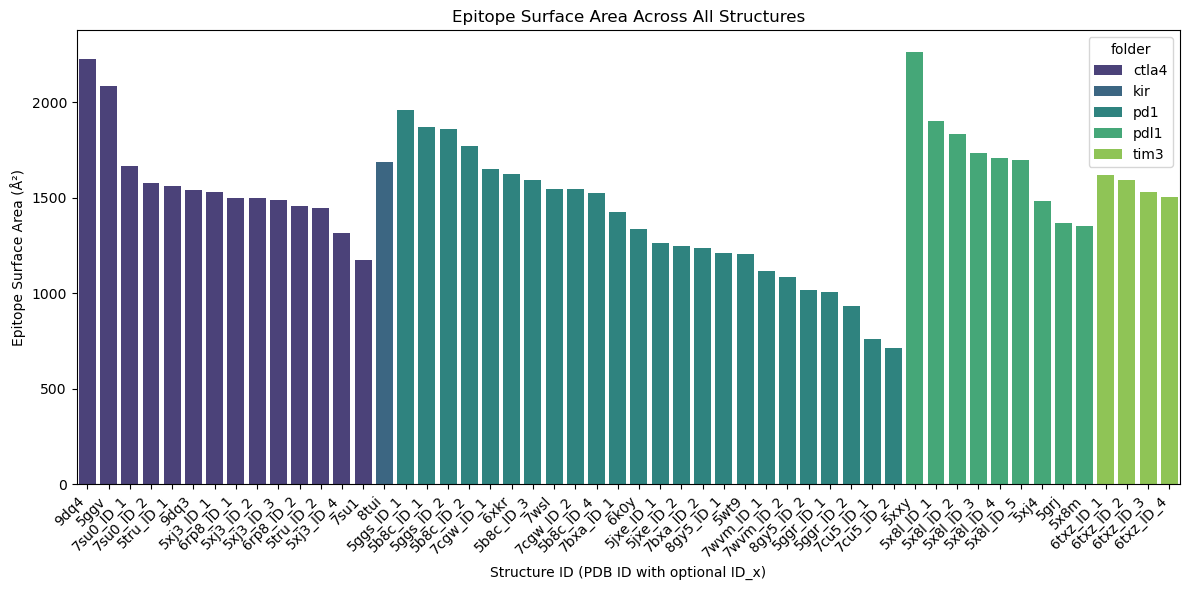

In [ ]:
from collections import defaultdict, Counter 

# Sort as before
df_sorted = df.sort_values(by=["folder", "epitope_area"], ascending=[True, False]).copy()

# Count how many times each pdb_id appears
id_frequencies = Counter(df_sorted["pdb_id"])
id_tracker = defaultdict(int)

# Build structure_id column
structure_ids = []

for pdb_id in df_sorted["pdb_id"]:
    if id_frequencies[pdb_id] == 1:
        structure_ids.append(pdb_id)
    else:
        id_tracker[pdb_id] += 1
        structure_ids.append(f"{pdb_id}_ID_{id_tracker[pdb_id]}")

df_sorted["structure_id"] = structure_ids

# Plotting (same as before)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="structure_id", y="epitope_area", hue="folder", dodge=False, palette="viridis")

plt.title("Epitope Surface Area Across All Structures")
plt.xlabel("Structure ID (PDB ID with optional ID_x)")
plt.ylabel("Epitope Surface Area (Å²)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('plots/epitope_surface_area_across_all_structures.pdf', bbox_inches='tight')
plt.show()



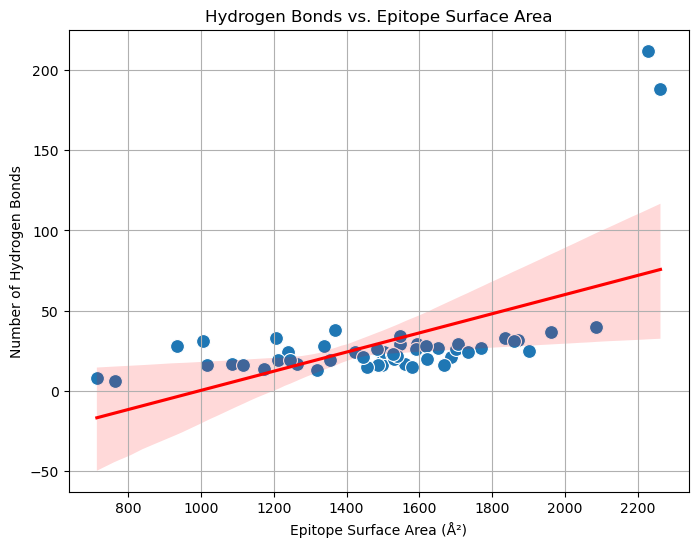

In [ ]:
df = pd.read_csv("epitope_surface_hbonds_summary.csv")

# Scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="epitope_area", y="num_hydrogen_bonds", s=100)
sns.regplot(data=df, x="epitope_area", y="num_hydrogen_bonds", scatter=False, color="red")
plt.xlabel("Epitope Surface Area (Å²)")
plt.ylabel("Number of Hydrogen Bonds")
plt.title("Hydrogen Bonds vs. Epitope Surface Area")
plt.grid(True)
plt.show()

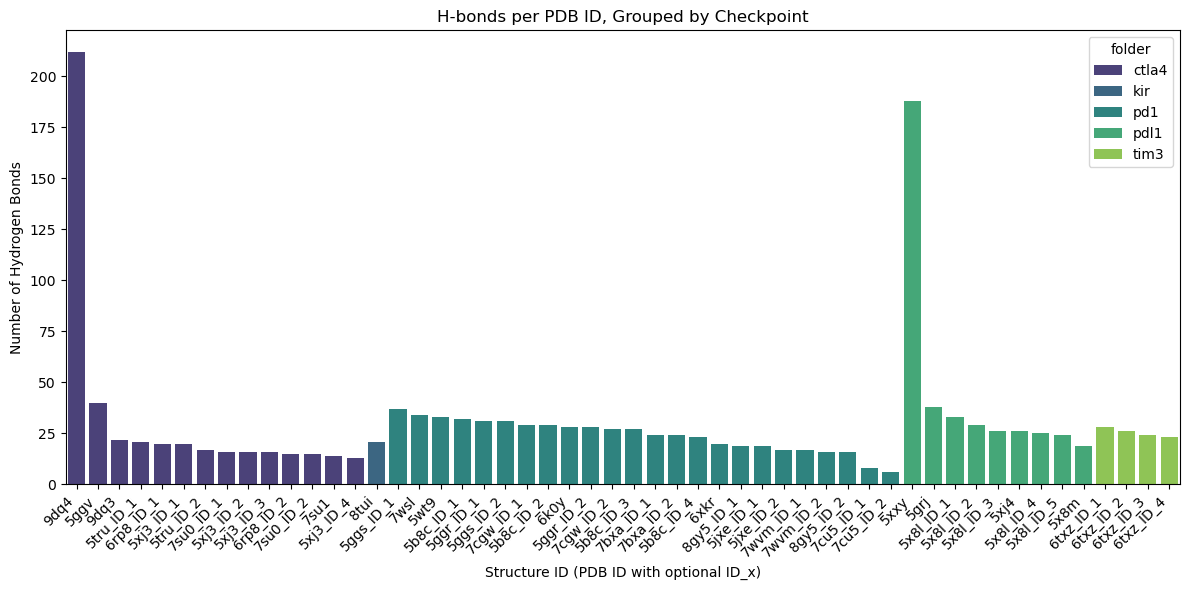

In [ ]:
from collections import defaultdict, Counter 

# Sort as before
df_sorted = df.sort_values(by=["folder", "num_hydrogen_bonds"], ascending=[True, False]).copy()

# Count how many times each pdb_id appears
id_frequencies = Counter(df_sorted["pdb_id"])
id_tracker = defaultdict(int)

# Build structure_id column
structure_ids = []

for pdb_id in df_sorted["pdb_id"]:
    if id_frequencies[pdb_id] == 1:
        structure_ids.append(pdb_id)
    else:
        id_tracker[pdb_id] += 1
        structure_ids.append(f"{pdb_id}_ID_{id_tracker[pdb_id]}")

df_sorted["structure_id"] = structure_ids

# Plotting (same as before)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="structure_id", y="num_hydrogen_bonds", hue="folder", dodge=False, palette="viridis")

plt.title("H-bonds per PDB ID, Grouped by Checkpoint")
plt.xlabel("Structure ID (PDB ID with optional ID_x)")
plt.ylabel("Number of Hydrogen Bonds")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('plots/h_bonds_per_PDB.pdf', bbox_inches='tight')
plt.show()

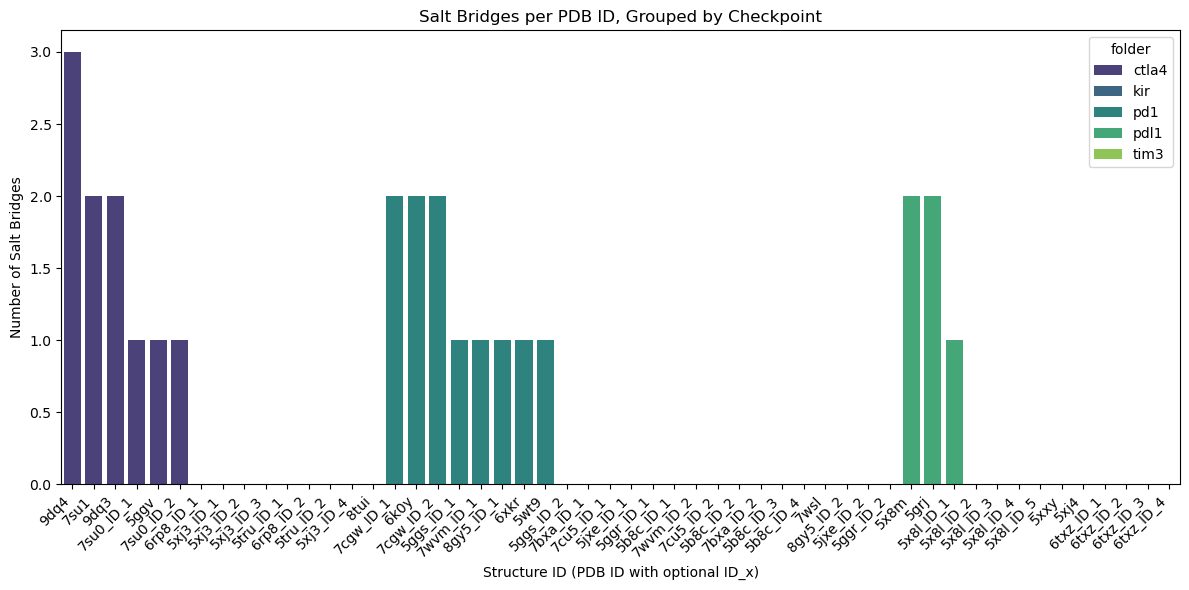

In [ ]:
from collections import defaultdict, Counter

# Sort as before
df_sorted = df.sort_values(by=["folder", "num_salt_bridges"], ascending=[True, False]).copy()

# Count how many times each pdb_id appears
id_frequencies = Counter(df_sorted["pdb_id"])
id_tracker = defaultdict(int)

# Build structure_id column
structure_ids = []

for pdb_id in df_sorted["pdb_id"]:
    if id_frequencies[pdb_id] == 1:
        structure_ids.append(pdb_id)
    else:
        id_tracker[pdb_id] += 1
        structure_ids.append(f"{pdb_id}_ID_{id_tracker[pdb_id]}")

df_sorted["structure_id"] = structure_ids


# Plotting (same as before)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="structure_id", y="num_salt_bridges", hue="folder", dodge=False, palette="viridis")

plt.title("Salt Bridges per PDB ID, Grouped by Checkpoint")
plt.xlabel("Structure ID (PDB ID with optional ID_x)")
plt.ylabel("Number of Salt Bridges")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('plots/salt_bridges_per_PDB.pdf', bbox_inches='tight')
plt.show()

# Binding Affinity Score

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#normalizing
scaler = MinMaxScaler()
df = pd.read_csv("epitope_surface_hbonds_summary.csv")
features = df[["num_hydrogen_bonds", "num_salt_bridges", "epitope_area"]]
normalized = scaler.fit_transform(features)

df_norm = pd.DataFrame(normalized, columns=features.columns)
df_norm["pdb_id"] = df["pdb_id"]  

# Create a binding strength score
weights = {
    "num_hydrogen_bonds": 0.4,
    "num_salt_bridges": 0.4,
    "epitope_area": 0.2
}

df_norm["binding_score"] = (
    df_norm["num_hydrogen_bonds"] * weights["num_hydrogen_bonds"] +
    df_norm["num_salt_bridges"] * weights["num_salt_bridges"] +
    df_norm["epitope_area"] * weights["epitope_area"]
)

# Show top binders
print(df_norm.sort_values("binding_score", ascending=False)[["pdb_id", "binding_score"]])


   pdb_id  binding_score
34   9dq4       0.995573
37   5xxy       0.553398
13   7cgw       0.428643
3    7cgw       0.418769
23   5grj       0.413341
48   9dq3       0.404239
8    6k0y       0.389920
44   5ggv       0.376486
14   5x8m       0.374642
2    7su1       0.341447
20   5ggs       0.330068
40   5x8l       0.300010
45   6xkr       0.277807
5    7su0       0.276012
50   7su0       0.262581
46   5wt9       0.249232
36   8gy5       0.222825
0    5ggs       0.221307
31   7wvm       0.204578
16   5b8c       0.200059
9    5x8l       0.197171
24   5x8l       0.190328
22   5b8c       0.177156
26   5x8l       0.172782
12   5x8l       0.166189
30   7wsl       0.161927
43   6txz       0.159394
29   5b8c       0.158367
1    8tui       0.154640
33   6txz       0.152117
51   6txz       0.138244
41   5xj4       0.138094
28   5b8c       0.137617
17   6txz       0.136912
47   5xj3       0.132534
32   5tru       0.130823
6    6rp8       0.128708
27   7bxa       0.126700
42   5tru       0.123491


In [ ]:
from collections import Counter, defaultdict

# Sort the dataframe
df_sorted = df_norm.sort_values(
    by=["binding_score", "num_hydrogen_bonds", "num_salt_bridges", "epitope_area"],
    ascending=[False, False, False, False]  # show top-scoring binders first
).copy()
# Count appearances
id_frequencies = Counter(df_sorted["pdb_id"])
id_tracker = defaultdict(int)

# Build unique structure IDs
structure_ids = []
for pdb_id in df_sorted["pdb_id"]:
    if id_frequencies[pdb_id] == 1:
        structure_ids.append(pdb_id)
    else:
        id_tracker[pdb_id] += 1
        structure_ids.append(f"{pdb_id}_ID_{id_tracker[pdb_id]}")

# Add to DataFrame
df_sorted["structure_id"] = structure_ids

/var/folders/4b/v_2x0lss5_bfxdnbx8y02n6r0000gn/T/ipykernel_53814/2995907592.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap("viridis")


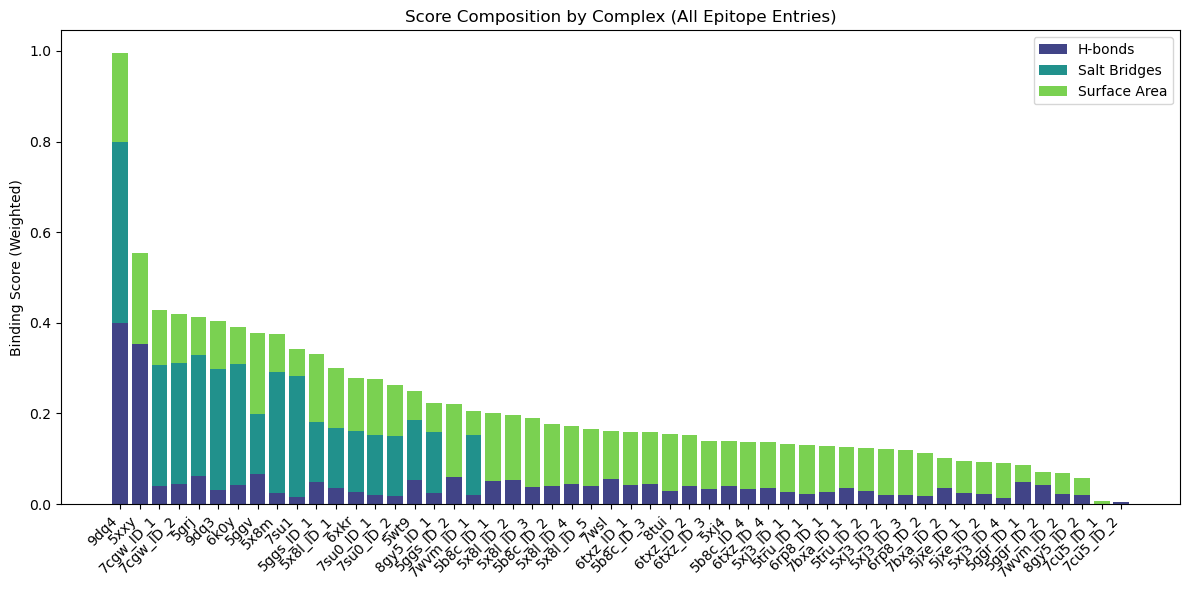

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Sort by binding score again
top = df_sorted.sort_values("binding_score", ascending=False)

# Use viridis colormap
viridis = cm.get_cmap("viridis")
colors = viridis(np.linspace(0.2, 0.8, 3))

plt.figure(figsize=(12, 6))

# Plot H-bonds
plt.bar(
    top["structure_id"],
    top["num_hydrogen_bonds"] * 0.4,
    label="H-bonds",
    color=colors[0],
    bottom=0
)

# Plot Salt Bridges
plt.bar(
    top["structure_id"],
    top["num_salt_bridges"] * 0.4,
    label="Salt Bridges",
    color=colors[1],
    bottom=top["num_hydrogen_bonds"] * 0.4
)

# Plot Surface Area
plt.bar(
    top["structure_id"],
    top["epitope_area"] * 0.2,
    label="Surface Area",
    color=colors[2],
    bottom=(top["num_hydrogen_bonds"] + top["num_salt_bridges"]) * 0.4
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Binding Score (Weighted)")
plt.title("Score Composition by Complex (All Epitope Entries)")
plt.legend()
plt.tight_layout()
plt.savefig("plots/epitope_binding_affinity_score.pdf", bbox_inches="tight")
plt.show()


# Sequences

In [ ]:
# -> old version of with sequences that are "unique" 
import os
from pymol import cmd
from Bio.SeqUtils import seq1 # 

# same as the code above
root_folder = "structures"         # Folder with your PDB files
cutoff_distance = 5.0              # Å distance for epitope definition
output_fasta = "epitope_sequences.fasta"


pdb_chain_dict = {entry[0].lower(): entry[1:] for entry in extracted_list}
sequences = []

# 
for dirpath, _, filenames in os.walk(root_folder):
    for file in filenames:
        if not file.endswith(".pdb"):
            continue

        pdb_id = file.replace(".pdb", "").lower()
        pdb_path = os.path.join(dirpath, file)

        if pdb_id not in pdb_chain_dict:
            print(f"⚠️ Skipping {pdb_id}: chain info not found.")
            continue

        h_chain, l_chain, ag_chain = pdb_chain_dict[pdb_id]
        print(f"🔍 Processing {pdb_id}...")

        cmd.reinitialize()
        cmd.load(pdb_path)

        # Define selection
        cmd.select("antibody", f"chain {h_chain}+{l_chain}")
        cmd.select("antigen", f"chain {ag_chain}")
        cmd.select("epitope", f"antigen within {cutoff_distance} of antibody")

        # Extract residue sequence from epitope
        model = cmd.get_model("epitope")
        seen = set()
        residues = []
        for atom in model.atom:
            res_id = (atom.chain, atom.resi)
            if res_id not in seen:
                seen.add(res_id)
                residues.append(atom.resn)

        sequence = ''.join(seq1(res) for res in residues if res != "HOH")
        sequences.append((pdb_id, sequence))

# Save FASTA file 
with open(output_fasta, "w") as f:
    for pdb_id, seq in sequences:
        f.write(f">{pdb_id}\n{seq}\n")

print(f"Epitope sequences saved to: {output_fasta}")


⚠️ Skipping 7tzh: chain info not found.
⚠️ Skipping 7tzg: chain info not found.
⚠️ Skipping 7dv4: chain info not found.
🔍 Processing 5tru...
⚠️ Skipping 6xy2: chain info not found.
🔍 Processing 7su0...
🔍 Processing 7su1...
⚠️ Skipping 7elx: chain info not found.
⚠️ Skipping 9dq5: chain info not found.
🔍 Processing 9dq4...
🔍 Processing 9dq3...
🔍 Processing 6rp8...
🔍 Processing 5xj3...
🔍 Processing 5ggv...
🔍 Processing 8gy5...
🔍 Processing 5b8c...
🔍 Processing 7wvm...
🔍 Processing 5jxe...
⚠️ Skipping 8u32: chain info not found.
⚠️ Skipping 8u31: chain info not found.
🔍 Processing 6xkr...
🔍 Processing 6k0y...
⚠️ Skipping 8as0: chain info not found.
⚠️ Skipping 7e9b: chain info not found.
🔍 Processing 7cu5...
🔍 Processing 7wsl...
🔍 Processing 5ggr...
🔍 Processing 5wt9...
🔍 Processing 5ggs...
🔍 Processing 7bxa...
⚠️ Skipping 6jjp: chain info not found.
🔍 Processing 7cgw...
🔍 Processing 8tui...
🔍 Processing 6txz...
🔍 Processing 5grj...
⚠️ Skipping 8rpb: chain info not found.
⚠️ Skipping 7yds

In [ ]:
# not unqiue sequences 
import os
from pymol import cmd
from Bio.SeqUtils import seq1
import pandas as pd
from collections import defaultdict, Counter

# Input settings
root_folder = "structures"
cutoff_distance = 5.0  # in Å
results = []

# Ensure extracted_list is defined
if 'extracted_list' not in locals():
    extracted_list = []  # Replace with actual data

# Loop through all extracted entries
for pdb_id, h_chain, l_chain, ag_chain in extracted_list:
    pdb_path = None
    for dirpath, _, filenames in os.walk(root_folder):
        for file in filenames:
            if file.lower() == f"{pdb_id.lower()}.pdb":
                pdb_path = os.path.join(dirpath, file)
                break
        if pdb_path:
            break

    if not pdb_path:
        print(f"Skipping {pdb_id}: PDB file not found")
        continue
    else:
        print(f"Processing {pdb_id}...")

    cmd.reinitialize()
    cmd.load(pdb_path)

    # Define selections
    cmd.select("antibody", f"chain {h_chain}+{l_chain}")
    cmd.select("antigen", f"chain {ag_chain}")
    cmd.select("epitope", f"antigen within {cutoff_distance} of antibody")

    # Extract unique residues from epitope
    model = cmd.get_model("epitope")
    seen = set()
    residues = []
    for atom in model.atom:
        res_id = (atom.chain, atom.resi)
        if res_id not in seen:
            seen.add(res_id)
            residues.append(atom.resn)

    sequence = ''.join(seq1(res) for res in residues if res != "HOH")

    # Collect results
    results.append({
        "pdb_id": pdb_id,
        "H_chain": h_chain,
        "L_chain": l_chain,
        "antigen_chain": ag_chain,
        "epitope_sequence": sequence,
        "folder": os.path.basename(dirpath)
    })

# Convert to DataFrame
df_seq = pd.DataFrame(results)

# Assign unique structure_id like in other analyses
df_seq = df_seq.sort_values(by=["folder", "epitope_sequence"], ascending=[True, False]).copy()
id_frequencies = Counter(df_seq["pdb_id"])
id_tracker = defaultdict(int)

structure_ids = []
for pdb_id in df_seq["pdb_id"]:
    if id_frequencies[pdb_id] == 1:
        structure_ids.append(pdb_id)
    else:
        id_tracker[pdb_id] += 1
        structure_ids.append(f"{pdb_id}_ID_{id_tracker[pdb_id]}")

df_seq["structure_id"] = structure_ids

# Save CSV
df_seq.to_csv("epitope_sequences_summary.csv", index=False)
print("Summary table saved to 'epitope_sequences_summary.csv'")

# Save FASTA
with open("epitope_sequences.fasta", "w") as f:
    for _, row in df_seq.iterrows():
        f.write(f">{row['structure_id']}\n{row['epitope_sequence']}\n")

print("FASTA file saved to 'epitope_sequences.fasta'")

# Add sequence to df_sorted

df_sorted = df_seq.sort_values(by=["folder", "epitope_sequence"], ascending=[True, False]).copy()
   


Processing 5ggs...
Processing 8tui...
Processing 7su1...
Processing 7cgw...
Processing 7bxa...
Processing 7su0...
Processing 6rp8...
Processing 5xj3...
Processing 6k0y...
Processing 5x8l...
Processing 7cu5...
Processing 5jxe...
Processing 5x8l...
Processing 7cgw...
Processing 5x8m...
Processing 5ggr...
Processing 5b8c...
Processing 6txz...
Processing 7wvm...
Processing 7cu5...
Processing 5ggs...
Processing 5xj3...
Processing 5b8c...
Processing 5grj...
Processing 5x8l...
Processing 5xj3...
Processing 5x8l...
Processing 7bxa...
Processing 5b8c...
Processing 5b8c...
Processing 7wsl...
Processing 7wvm...
Processing 5tru...
Processing 6txz...
Processing 9dq4...
Processing 6rp8...
Processing 8gy5...
Processing 5xxy...
Processing 8gy5...
Processing 5jxe...
Processing 5x8l...
Processing 5xj4...
Processing 5tru...
Processing 6txz...
Processing 5ggv...
Processing 6xkr...
Processing 5wt9...
Processing 5xj3...
Processing 9dq3...
Processing 5ggr...
Processing 7su0...
Processing 6txz...
Summary tabl

In [ ]:
print(df_sorted)


   pdb_id H_chain L_chain antigen_chain                  epitope_sequence  \
6    6rp8       H       L             C        MHVERTLQSVTEIKELMYPPPYYLGI   
48   9dq3       H       L             C           MHERLQVTEIKELMYPPYYLGIN   
35   6rp8       h       l             c           MHERLQSVTEIKEMYPPPYYLGI   
21   5xj3       G       H             I            KMERTLVTETKEMYPPPYYLGI   
25   5xj3       A       B             C          KMERTLSVTETIKEMYPPPYYLGI   
47   5xj3       D       E             F         KMERTLSVTETIKELMYPPPYYLGI   
44   5ggv       H       L             Y   KAMPERLQSQVTETLIKELMYPPYYLGIGNG   
7    5xj3       J       K             L          KAMERTLVTETIKEMYPPPYYLGI   
34   9dq4       H       L             A  IQVSPHERTLQMTETTYLKELMYPPPYFVGMN   
50   7su0       H       L             C        AMHVERTLQVTEIKELMYPPPYYLGI   
5    7su0       I       M             D      AMHERTLQSQVTETIKELMYPPPYYLGI   
32   5tru       h       l             c         AMHERTLQSQVEIKEMYPPPYYLGI   

# BLAST

### BLAST (compare everything)

In [ ]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from Bio import SeqIO
import time

# input file: epitope sequences
input_file = "epitope_sequences.fasta"
output_file = "blast_summary.txt"

# Open output text file
with open(output_file, "w") as out:
    # Loop through all sequences in the FASTA file
    for record in SeqIO.parse(input_file, "fasta"):
        print(f"Running BLAST for {record.id}...")

        # Send sequence to NCBI BLAST (protein database)
        result = NCBIWWW.qblast("blastp", "nr", record.seq)

        # Read the result from NCBI
        blast_record = NCBIXML.read(result)

        # Save top 3 hits for this sequence
        out.write(f"\n=== {record.id} ===\n")
        for hit in blast_record.alignments[:3]:
            hsp = hit.hsps[0]
            out.write(f"- Hit: {hit.title}\n")
            out.write(f"  Identity: {hsp.identities}/{hsp.align_length}\n")
            out.write(f"  E-value: {hsp.expect}\n")

        # Wait 3 seconds ???
        time.sleep(3)

print("Results are saved in 'blast_summary.txt'")


Running BLAST for 5tru...
Running BLAST for 7su0...
Running BLAST for 7su1...
Running BLAST for 9dq4...
Running BLAST for 9dq3...
Running BLAST for 6rp8...
Running BLAST for 5xj3...
Running BLAST for 5ggv...
Running BLAST for 8gy5...
Running BLAST for 5b8c...
Running BLAST for 7wvm...
Running BLAST for 5jxe...
Running BLAST for 6xkr...
Running BLAST for 6k0y...
Running BLAST for 7cu5...
Running BLAST for 7wsl...
Running BLAST for 5ggr...
Running BLAST for 5wt9...
Running BLAST for 5ggs...
Running BLAST for 7bxa...
Running BLAST for 7cgw...
Running BLAST for 8tui...
Running BLAST for 6txz...
Running BLAST for 5grj...


/opt/anaconda3/envs/pymol-env/lib/python3.9/site-packages/Bio/Blast/NCBIWWW.py:275: BiopythonWarning: BLAST request 53K29CK5016 is taking longer than 10 minutes, consider re-issuing it
  warnings.warn(


KeyboardInterrupt: 

### Test BLAST

In [ ]:
from Bio import SeqIO
from Bio.Blast import NCBIWWW
import time

# Load first 3 sequences from your FASTA file 
input_file = "epitope_sequences.fasta"
records = list(SeqIO.parse(input_file, "fasta"))[:3]  # Only first 3

for record in records:
    print(f"🔬 Running BLAST for {record.id}...")

    # Run BLASTP on NCBI's non-redundant database
    result_handle = NCBIWWW.qblast("blastp", "nr", record.seq)

    # Save raw BLAST output as XML
    output_filename = f"blast_{record.id}.xml"
    with open(output_filename, "w") as f:
        f.write(result_handle.read())

    print(f"Saved BLAST result to {output_filename}")
    time.sleep(3)  


🔬 Running BLAST for 5ggs_ABZ...


KeyboardInterrupt: 

# Test without BLAST

In [ ]:
from Bio import SeqIO # to read sequences from a FASTA file
from Bio import pairwise2 # pairwise sequence alignments
import pandas as pd

# Load your sequences
records = list(SeqIO.parse("epitope_sequences.fasta", "fasta"))

# Initialize identity matrix
matrix = []

# Compare each pair
for r1 in records:
    row = []
    for r2 in records:
        alignments = pairwise2.align.globalxx(r1.seq, r2.seq) # Align two sequences (whole sequence)
        best = alignments[0]
        identity = best.score / max(len(r1.seq), len(r2.seq)) * 100  # identiy in % -> (number of matches) / (length of longer sequence) × 100
        row.append(round(identity, 2))
    matrix.append(row)

# Create a DataFrame
ids = [rec.id for rec in records]
df = pd.DataFrame(matrix, index=ids, columns=ids)

# Save & show
df.to_csv("epitope_sequence_comparison_matrix.csv")
print(" Sequence identity matrix saved to 'epitope_sequence_comparison_matrix.csv'")
print(df)


 Sequence identity matrix saved to 'epitope_sequence_comparison_matrix.csv'
           6rp8_ID_1    9dq3  6rp8_ID_2  5xj3_ID_1  5xj3_ID_2  5xj3_ID_3  \
6rp8_ID_1     100.00   84.62      88.46      76.92      84.62      88.46   
9dq3           84.62  100.00      91.30      78.26      79.17      80.00   
6rp8_ID_2      88.46   91.30     100.00      82.61      87.50      84.00   
5xj3_ID_1      76.92   78.26      82.61     100.00      91.67      88.00   
5xj3_ID_2      84.62   79.17      87.50      91.67     100.00      96.00   
5xj3_ID_3      88.46   80.00      84.00      88.00      96.00     100.00   
5ggv           70.97   70.97      67.74      64.52      70.97      74.19   
5xj3_ID_4      80.77   79.17      83.33      91.67      95.83      92.00   
9dq4           56.25   53.12      50.00      50.00      50.00      53.12   
7su0_ID_1      96.15   84.62      84.62      76.92      80.77      84.62   
7su0_ID_2      89.29   78.57      82.14      75.00      82.14      85.71   
5tru_ID_1   

# Plotting

### Heatmap identiy matrix

/var/folders/4b/v_2x0lss5_bfxdnbx8y02n6r0000gn/T/ipykernel_53814/1908997873.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = df.applymap(lambda x: f"{x:.0f}")


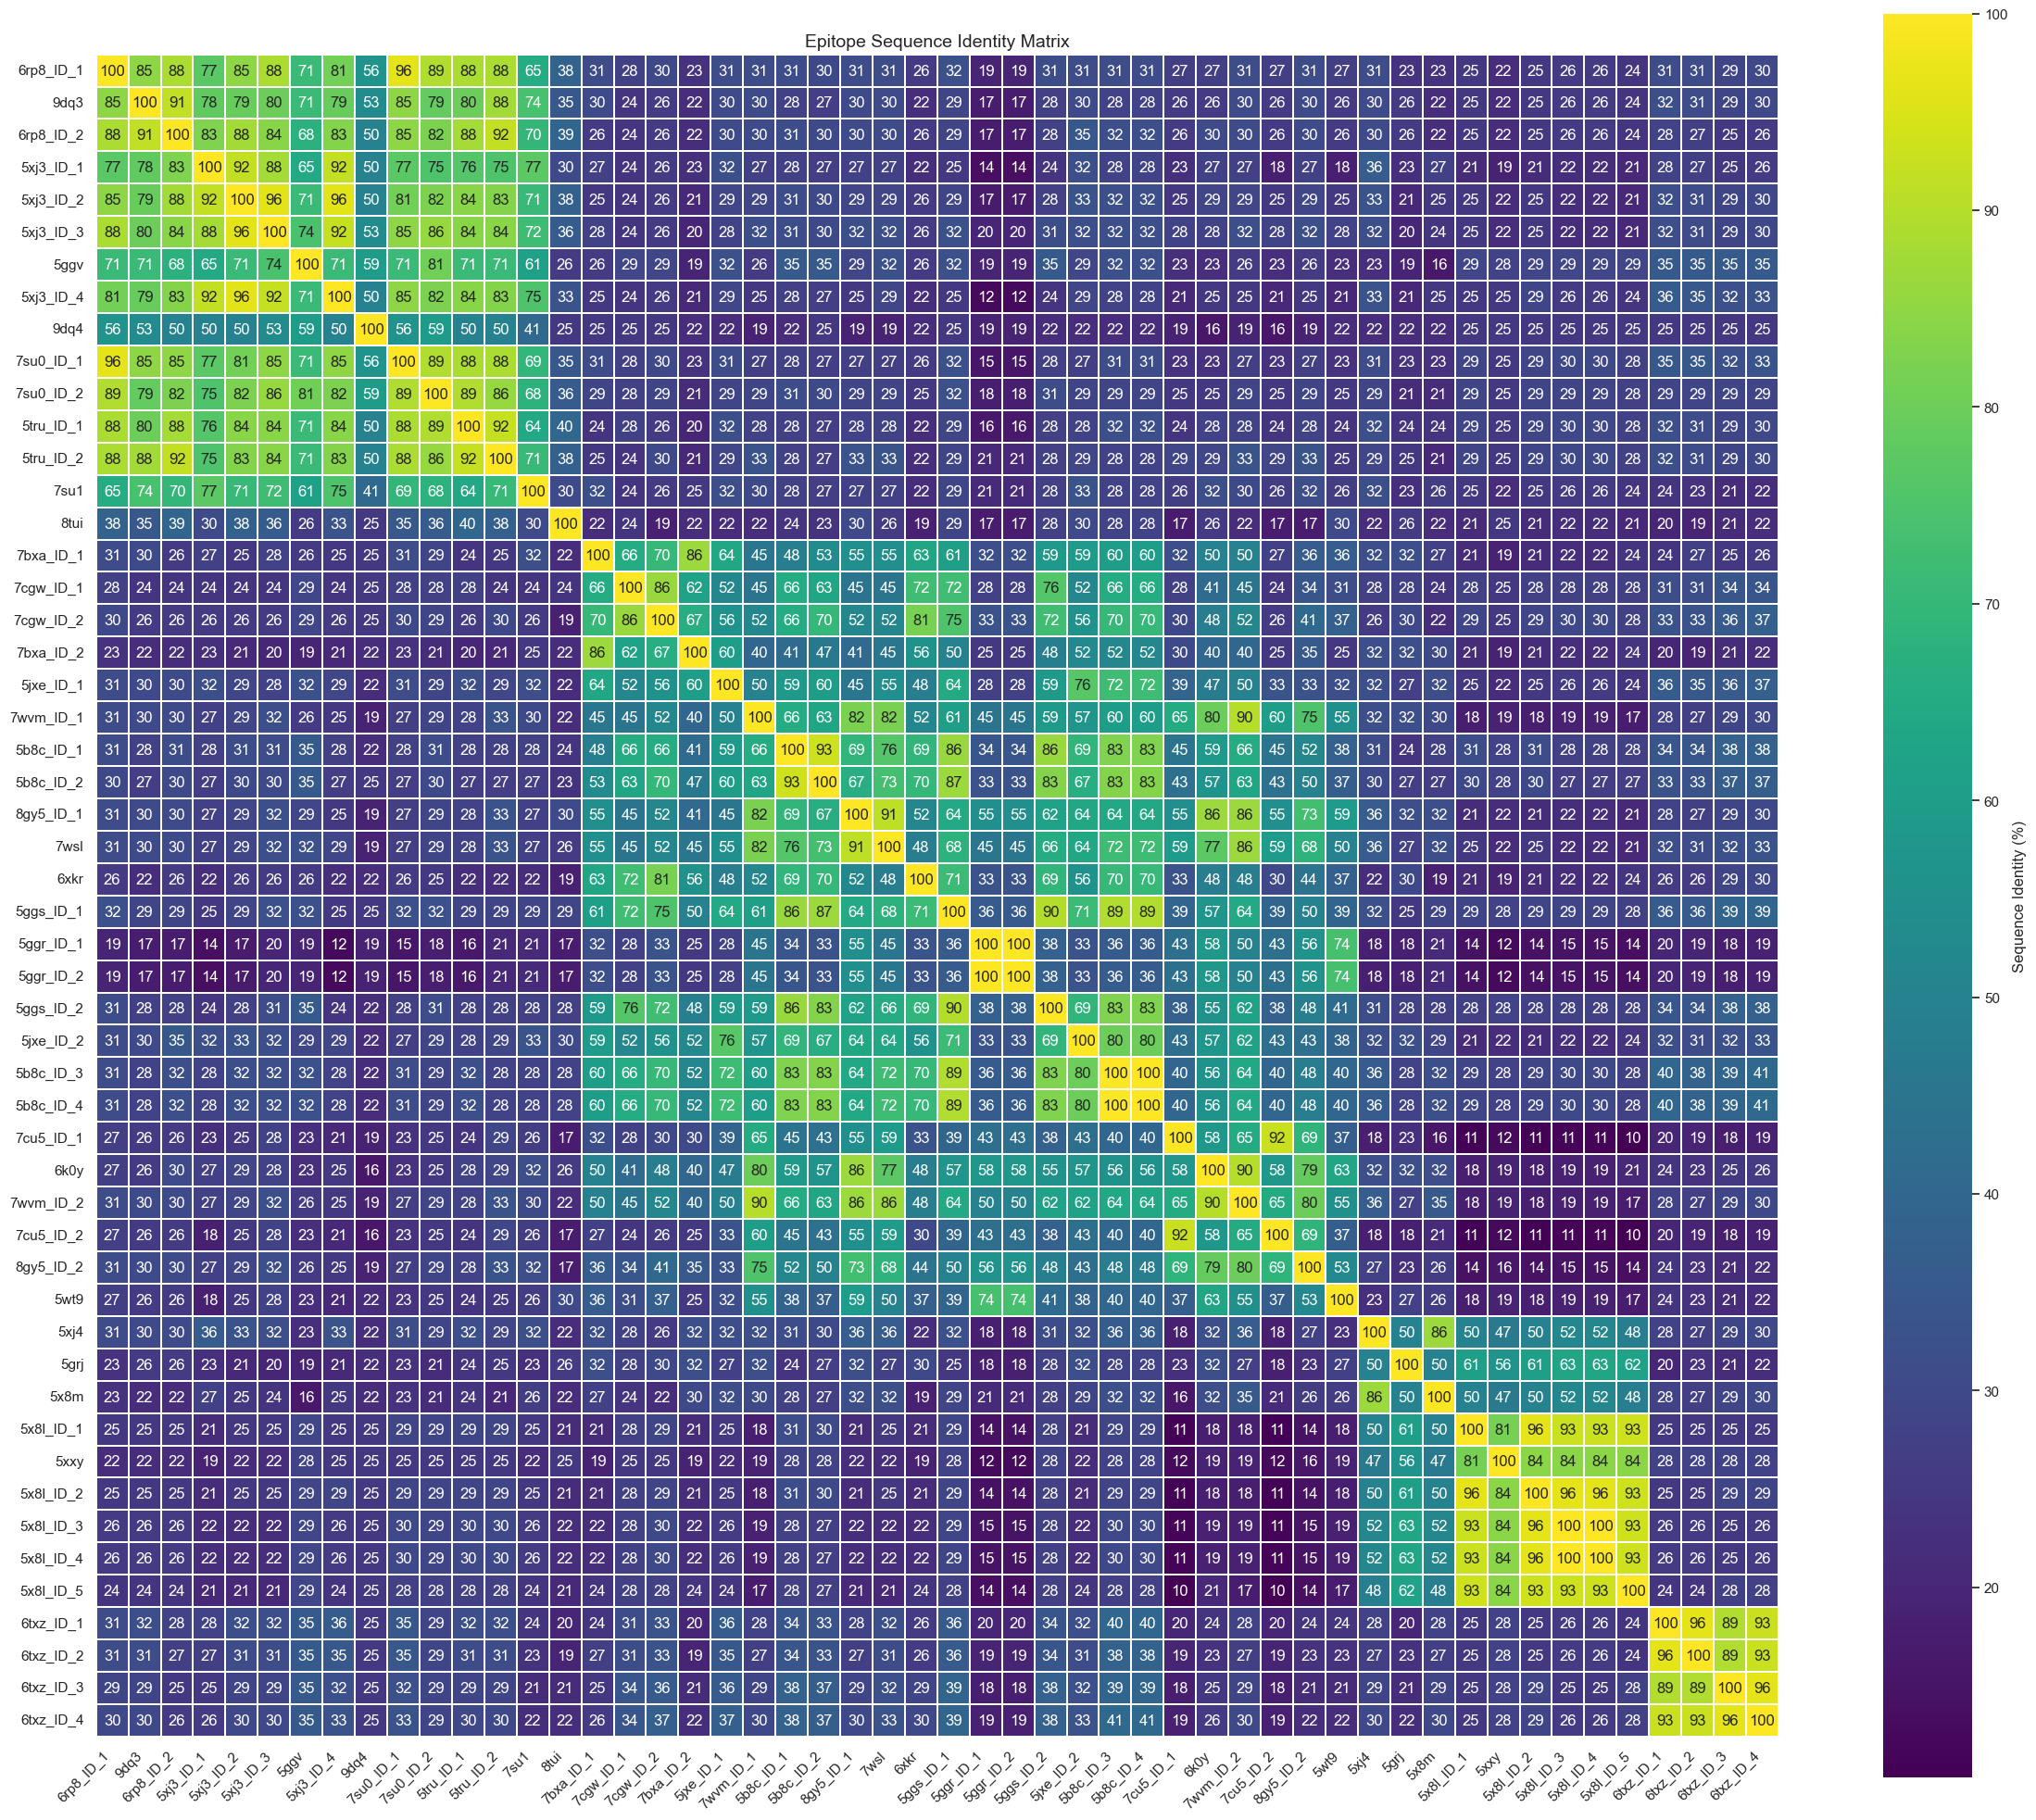

Cleaned-up heatmap saved as 'epitope_identity_heatmap_final.png'


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from collections import defaultdict, Counter

annot_data = df.applymap(lambda x: f"{x:.0f}")
mask = None

plt.figure(figsize=(24, 20))
sns.set(style="white", font_scale=1.0)
# annot_data = df.applymap(lambda x: f"{int(x)}" if x >= 70 else "")


ax = sns.heatmap(
    df, 
    annot=annot_data, 
    fmt="", 
    cmap="viridis", 
    mask=mask,
    square=True, 
    linewidths=0.3, 
    cbar_kws={"label": "Sequence Identity (%)"}
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Epitope Sequence Identity Matrix", fontsize=14)
plt.tight_layout()

plt.savefig("epitope_identity_heatmap_final.png", dpi=300)
plt.show()

print("Cleaned-up heatmap saved as 'epitope_identity_heatmap_final.png'")



### clustermap identiy matrix

/var/folders/4b/v_2x0lss5_bfxdnbx8y02n6r0000gn/T/ipykernel_53814/2478314328.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = df.applymap(lambda x: f"{int(x)}" if x >= 70 else "")


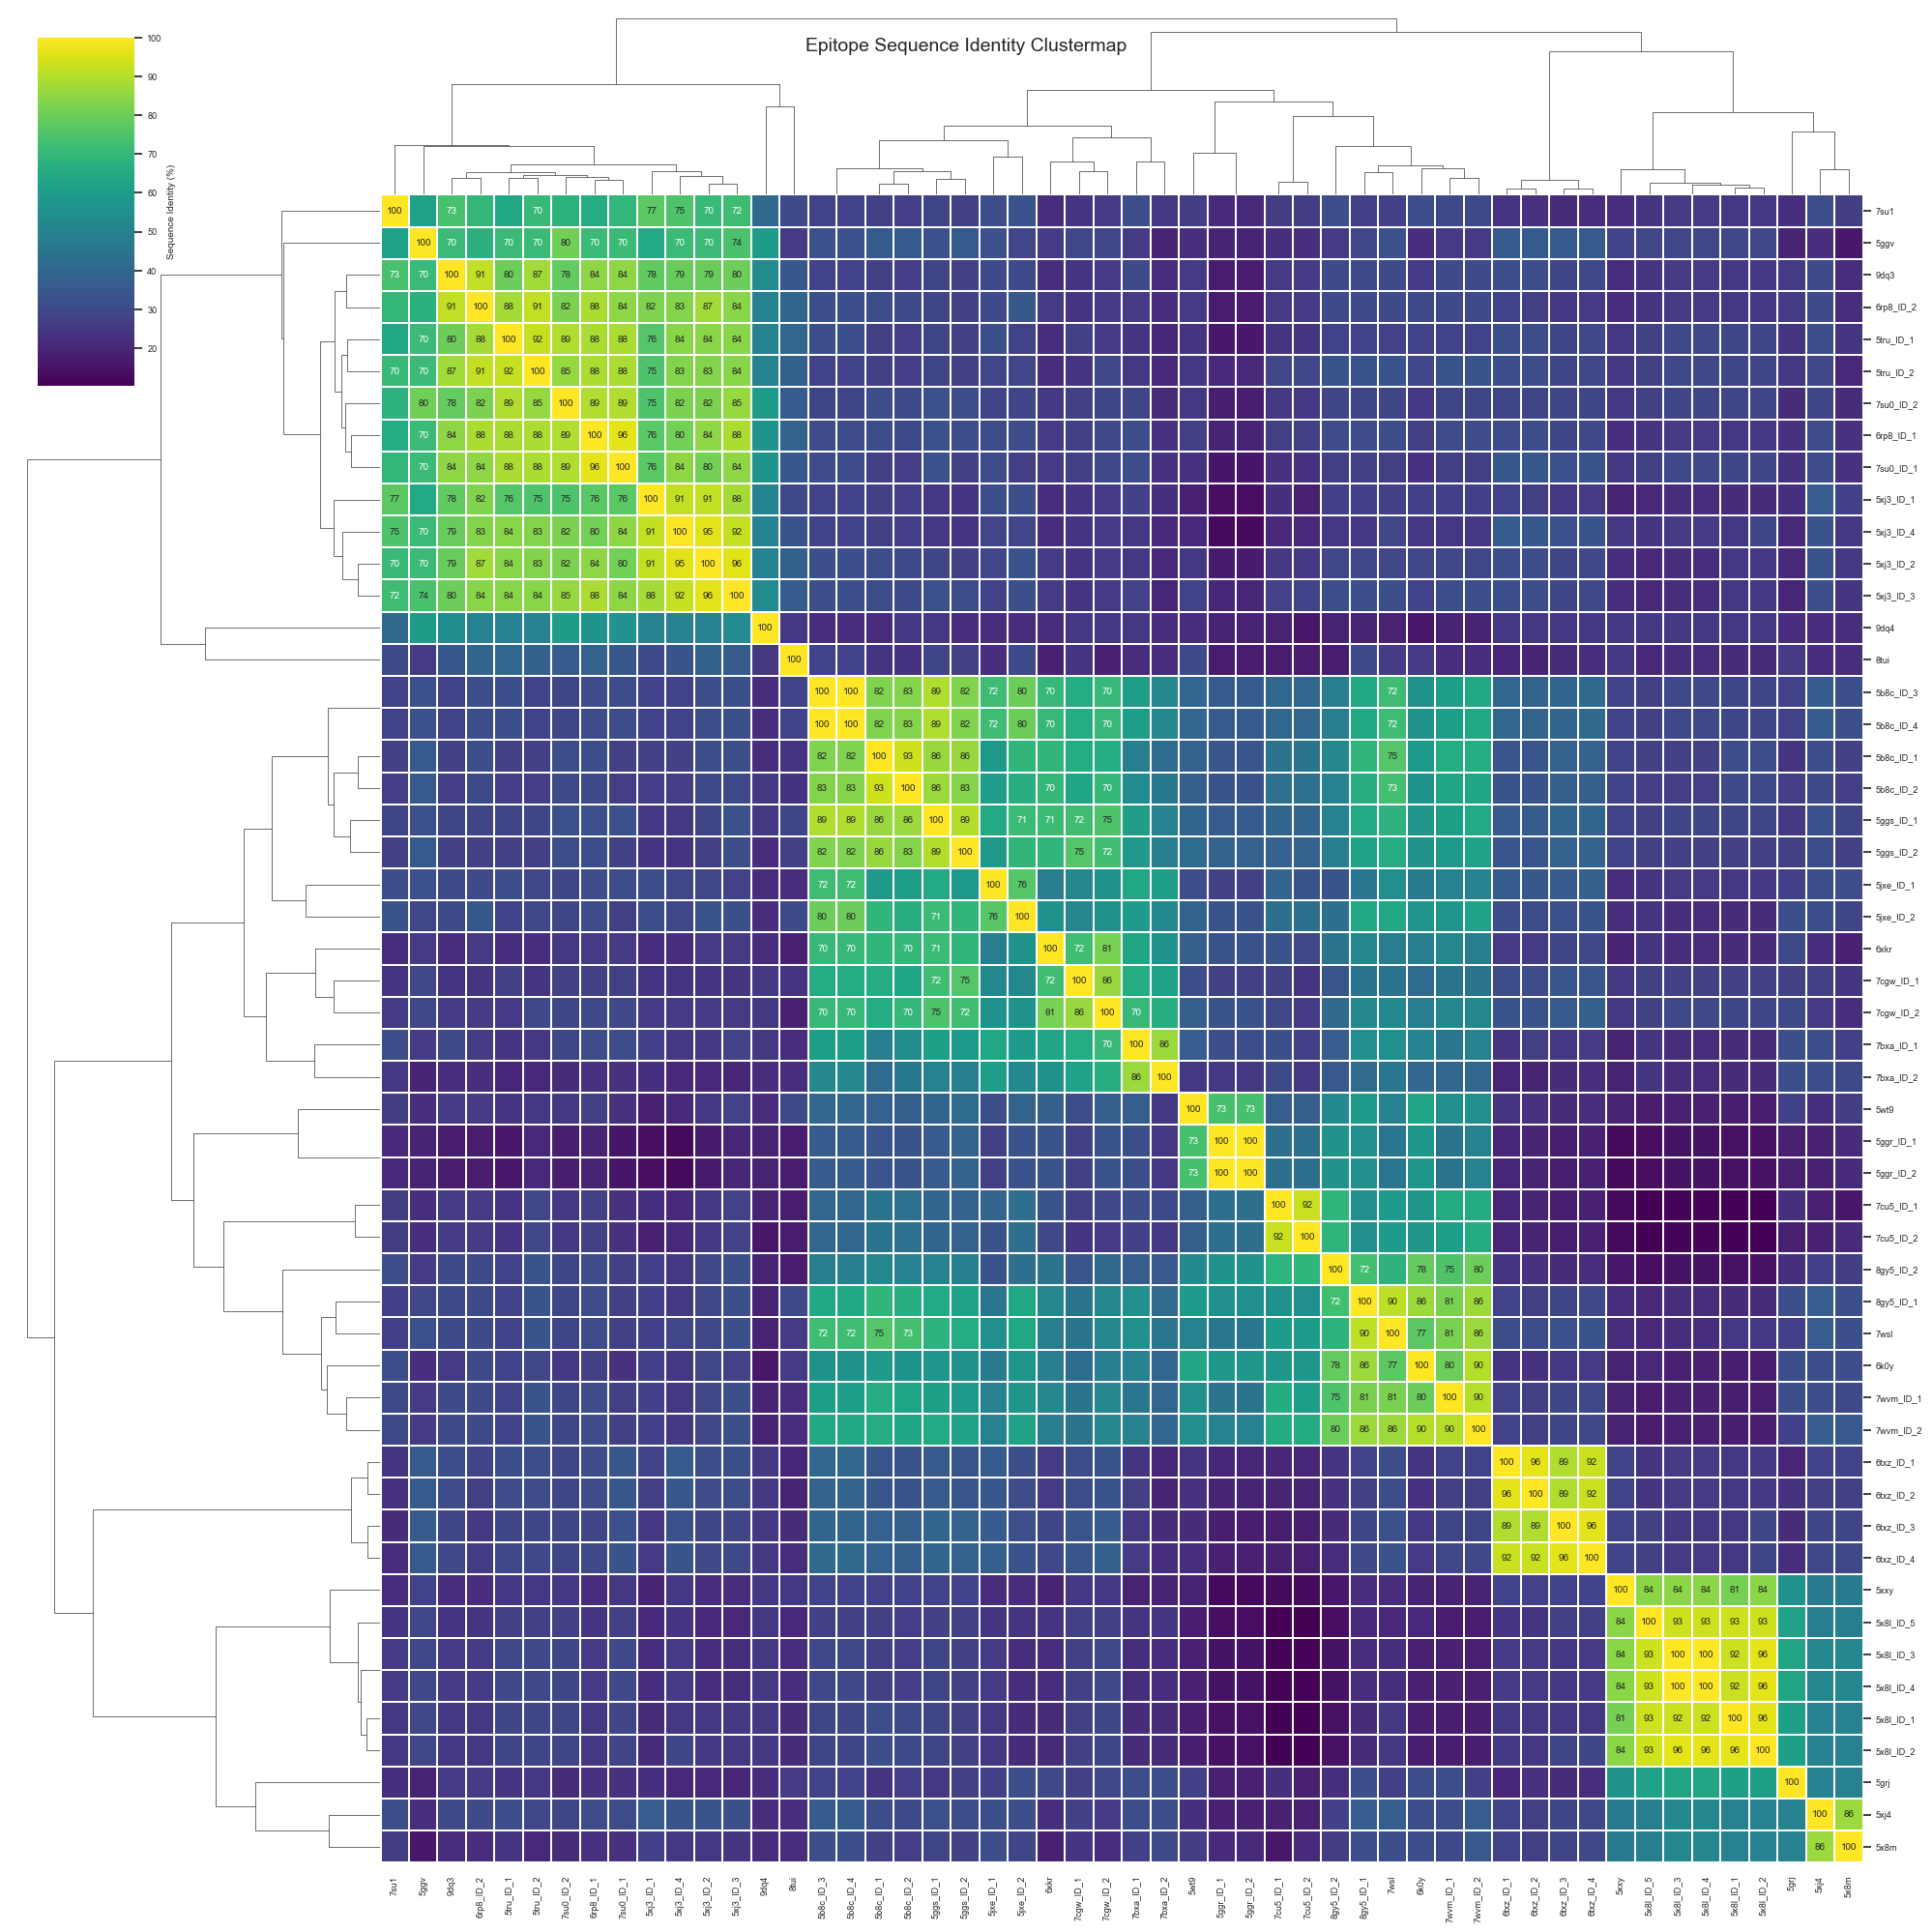

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: annotate only high identities
annot_data = df.applymap(lambda x: f"{int(x)}" if x >= 70 else "")

# Seaborn clustermap
sns.set(font_scale=0.6)  # smaller font for big matrices
g = sns.clustermap(
    df,
    cmap="viridis",
    figsize=(20, 20),
    annot=annot_data,
    fmt="",
    linewidths=0.3,
    cbar_kws={"label": "Sequence Identity (%)"},
    dendrogram_ratio=(.2, .1),  # ratio for row/col dendrograms
    xticklabels=True,
    yticklabels=True
)



# Optional: save as high-res PDF
g.fig.suptitle("Epitope Sequence Identity Clustermap", fontsize=14)
plt.savefig("epitope_clustermap.pdf", dpi=300, bbox_inches="tight")
plt.show()


### plotting sequences

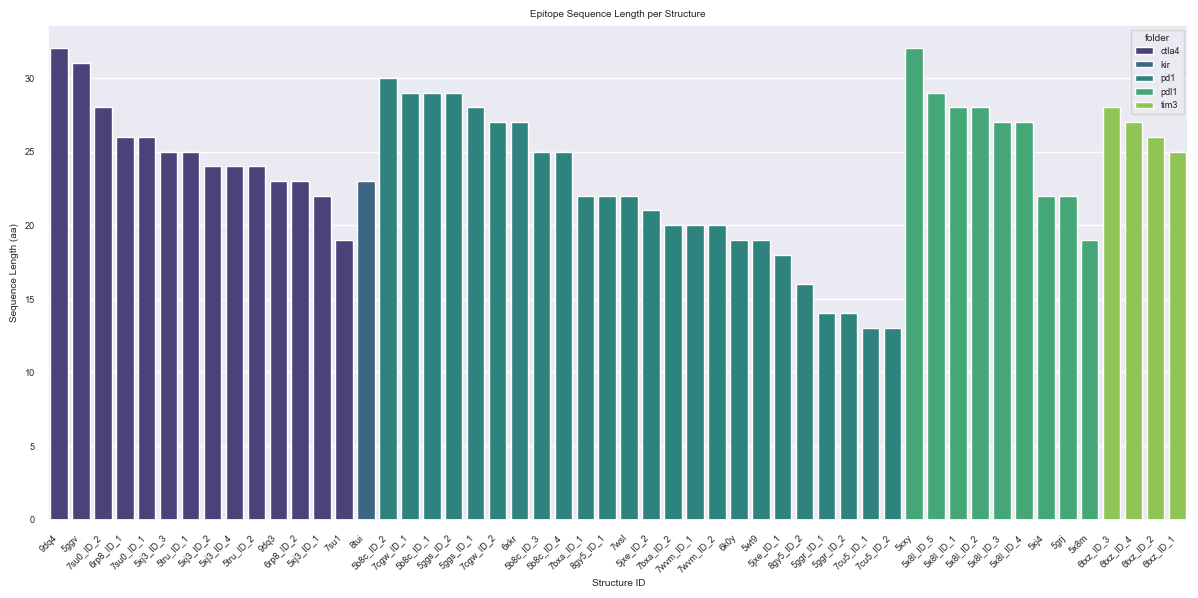

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a column with the sequence length
df_seq["epitope_length"] = df_seq["epitope_sequence"].str.len()

# Sort for better visualization (optional)
df_seq_sorted = df_seq.sort_values(by=["folder", "epitope_length"], ascending=[True, False])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_seq_sorted, x="structure_id", y="epitope_length", hue="folder", dodge=False, palette="viridis")

plt.title("Epitope Sequence Length per Structure")
plt.xlabel("Structure ID")
plt.ylabel("Sequence Length (aa)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("epitope_sequence_lengths.pdf", bbox_inches='tight')
plt.show()


# Do different checkpoint targets tend to bind larger/smaller epitopes?

<Axes: xlabel='folder', ylabel='epitope_area'>

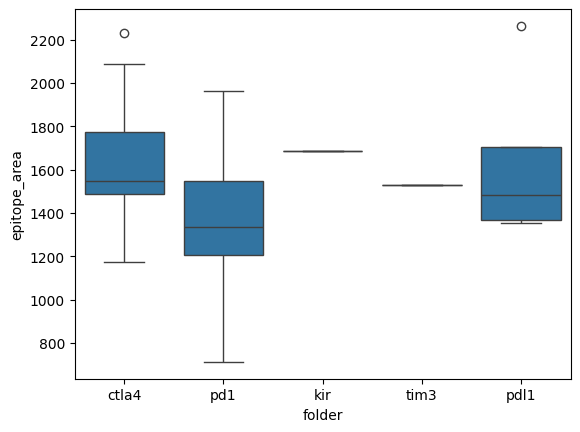

In [ ]:
surface_data_epi = pd.read_csv('epitope_surface_areas_all.csv')
surface_data_epi = surface_data_epi[['epitope_area', 'pdb_id', 'folder']]
sns.boxplot(x=surface_data_epi['folder'], y=surface_data_epi['epitope_area'])

<Axes: xlabel='folder', ylabel='paratope_area'>

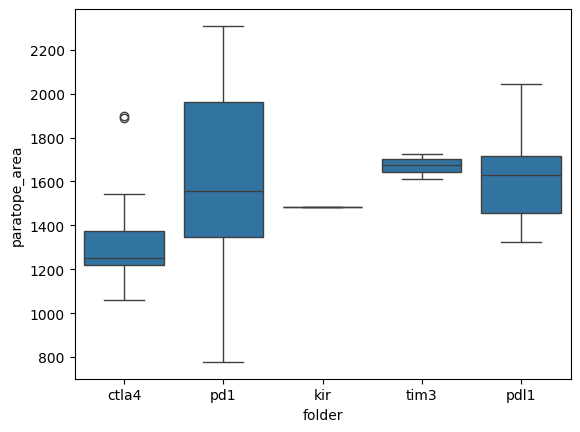

In [26]:
surface_data_para = pd.read_csv('paratope_surface_hbonds_summary.csv')
surface_data_para = surface_data_para[['paratope_area', 'pdb_id', 'folder']]
custom_order = ['ctla4', 'pd1', 'kir', 'tim3', 'pdl1']  # replace with your actual folder names
sns.boxplot(x=surface_data_para['folder'], y=surface_data_para['paratope_area'], order = custom_order)

In [29]:
from scipy.stats import kruskal

grouped_scores = [
    group["paratope_area"].dropna().values
    for name, group in surface_data_para.groupby("folder")
]

# 2. Kruskal–Wallis-Test
stat, p = kruskal(*grouped_scores)

print(f"Kruskal–Wallis-Test: H = {stat:.3f}, p = {p:.4e}")

Kruskal–Wallis-Test: H = 11.391, p = 2.2508e-02
